# Fake Job Posting

**Description**
This Kaggle dataset con*tains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The task is to train classification model to detect which job posts are fraudulent.

- A subset of the Amazon Fraud Dataset compilation
- Amazon Fraud Dataset: https://github.com/amazon-science/fraud-dataset-benchmark
- Source URL: https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction
- Source license: https://creativecommons.org/publicdomain/zero/1.0/



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
fakejob_df = pd.read_csv("../data/fraud/preprocessed/fakejob.csv")

In [7]:
fakejob_df.head()

,EVENT_ID,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,EVENT_LABEL,ENTITY_ID,ENTITY_TYPE
0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,0,7ff262bc-22f5-47d7-976f-da251c4be9d9,user
1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,0,b85a52c1-d872-465e-8bb6-0afae684a5b0,user
2,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,e2d8f96e-d055-4d52-9d3e-2de1cabccef8,user
3,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,0,1,0,Full-time,Associate,Professional,Financial Services,Legal,0,175bb976-f520-45ce-bf01-1a0d591664af,user
4,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,0,0,0,Part-time,NaN,NaN,Accounting,NaN,0,7de791d9-a1c5-4de0-a475-d6cb27d5c453,user


* We can split the location by Country, State, City, etc.

In [10]:
fakejob_df["EVENT_LABEL"].value_counts()

EVENT_LABEL
0    13625
1      679
Name: count, dtype: int64

In [16]:
fakejob_df.dtypes

EVENT_ID                int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
EVENT_LABEL             int64
ENTITY_ID              object
ENTITY_TYPE            object
country                object
state                  object
city                   object
dtype: object

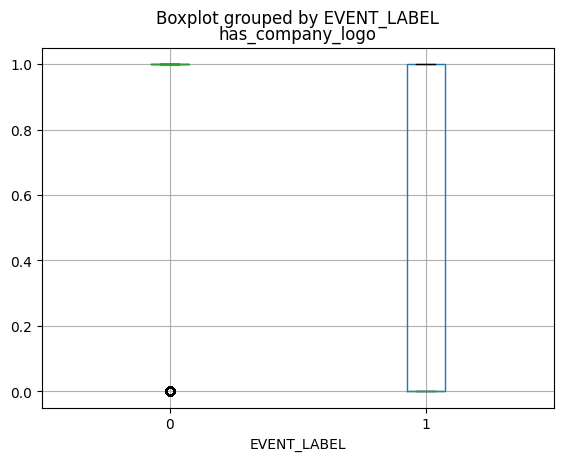

In [8]:
fakejob_df.boxplot(column = 'has_company_logo', by = 'EVENT_LABEL')
# plt.ylim(0,1000)
plt.show()

In [13]:
def split_location_features(df):
    """
    Split location column into country, state, and city columns without changing the 
    dataframe shape
    
    Args:
        df: DataFrame with a 'location' column
        
    Returns:
        DataFrame with added country, state, and city columns
    """
    import numpy as np
    import pandas as pd
    
    # Create a copy to avoid modifying the original dataframe
    df_result = df.copy()
    
    # Initialize country, state, and city columns with NaN
    df_result['country'] = np.nan
    df_result['state'] = np.nan
    df_result['city'] = np.nan
    
    # Process only non-null location values
    mask = df_result['location'].notna()
    
    # For rows with location data, split and assign
    for idx in df_result[mask].index:
        loc = df_result.loc[idx, 'location']
        
        # Split location by comma
        loc_parts = loc.split(', ')
        
        # Assign parts to appropriate columns
        if len(loc_parts) >= 1:
            df_result.loc[idx, 'country'] = loc_parts[0]
        if len(loc_parts) >= 2:
            df_result.loc[idx, 'state'] = loc_parts[1]
        if len(loc_parts) >= 3:
            # Join any remaining parts for city
            df_result.loc[idx, 'city'] = ', '.join(loc_parts[2:])
    
    # Fill NaN values with 'Unspecified'
    df_result['country'] = df_result['country'].fillna('Unspecified')
    df_result['state'] = df_result['state'].fillna('Unspecified')
    df_result['city'] = df_result['city'].fillna('Unspecified')
    
    return df_result

# Example usage:
fakejob_df = split_location_features(fakejob_df)


/var/folders/g2/yw25hwg538z2t1h4b9_tdl700000gn/T/ipykernel_31350/2110235033.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'US' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_result.loc[idx, 'country'] = loc_parts[0]
/var/folders/g2/yw25hwg538z2t1h4b9_tdl700000gn/T/ipykernel_31350/2110235033.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NJ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_result.loc[idx, 'state'] = loc_parts[1]
/var/folders/g2/yw25hwg538z2t1h4b9_tdl700000gn/T/ipykernel_31350/2110235033.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'PISCATAWAY' has dtype incompatible with float64, please explicitly cast to a compatibl

In [15]:
fake = fakejob_df[fakejob_df["EVENT_LABEL"]==1]

fake["country"].value_counts()

country
US             582
AU              31
GB              17
Unspecified     16
MY               8
CA               8
QA               4
BH               4
IN               3
PL               2
PH               1
ID               1
TW               1
ZA               1
Name: count, dtype: int64

* US shows us the most with fraudulent postings